hey i am follwing the book called self attention from scratch .

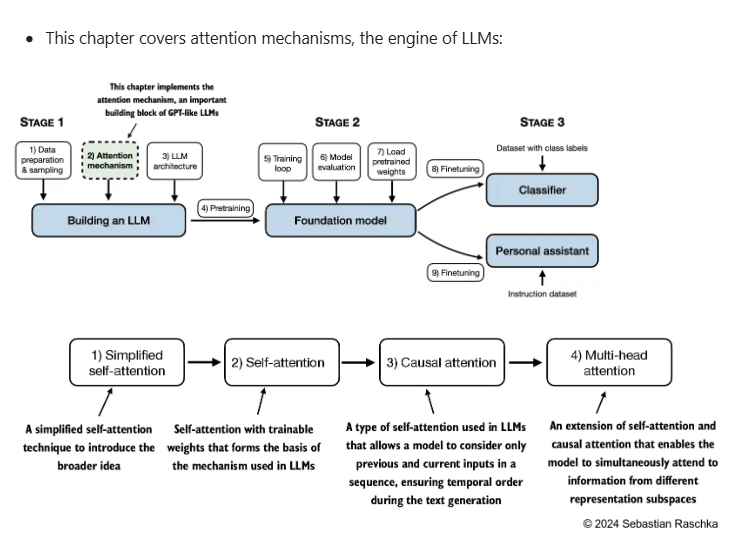

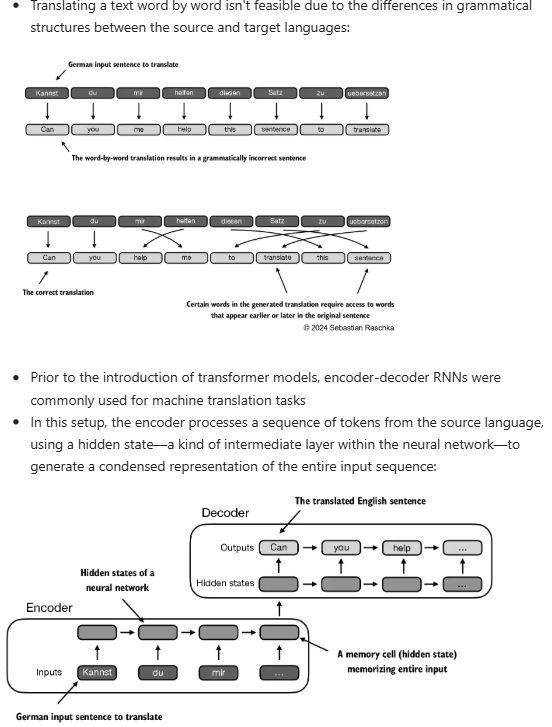

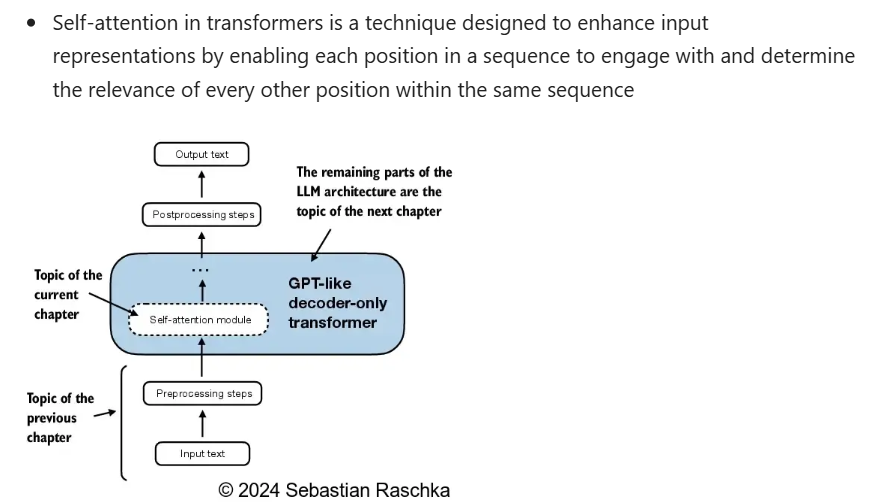

**bABY lets start understanding the self attention --
1) self attention basix idea <br>
2) self attention real <br>
3) causal self attention <br>
4) multihead attention
<br>

THIS IS THE FLOW we are going **

1) 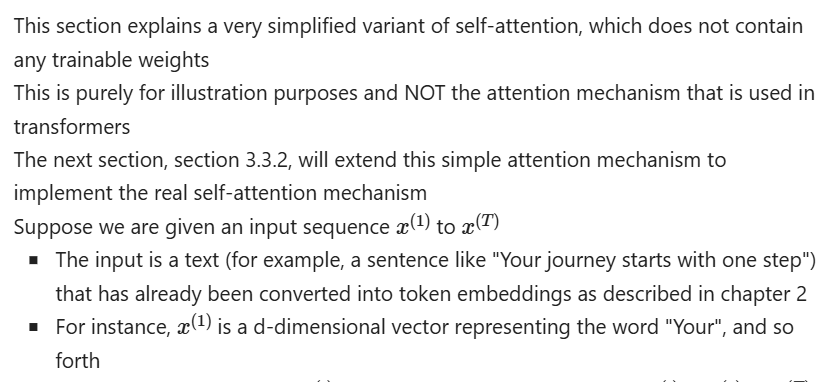

 ** idea of self attention is simple write the embeddings of one word in terms of all the embeddings in the sentence to bring the contextual embeddings
 "money bank grows "

 embed of money = (a1* w-money ) + (a2 * w-bank ) + (a3 * grows) **



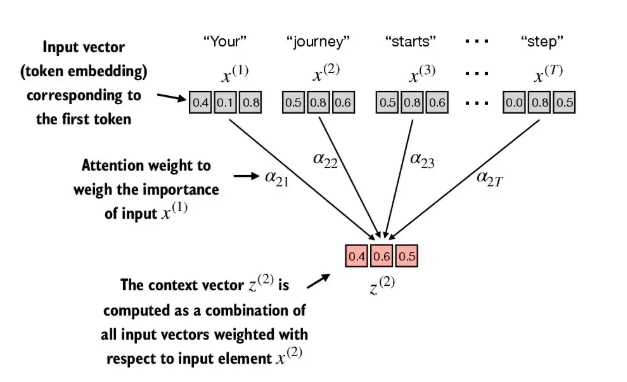

**QUESTION 1 : hey your are given sentence " your journey starts with one step "
and they words are embedded to 3dim as bellow fig. <br>
now the task is
1) make the vizualization of all the words in the embed sapce <br>
2) caluclate the contextual embeddings of word 2
<br> 3) make the contextual embeddings of the vectors   **

In [ ]:

import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6) ,

)

NOTE WE SAY DOT PRODUCT IS THE THING THAT SAYS THE SIMILARIty FIR THE VECTORS . and after calucaltion the attention scores we will normalize them with the soft max

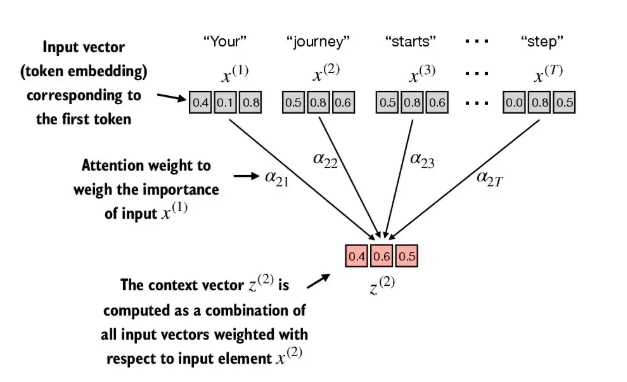

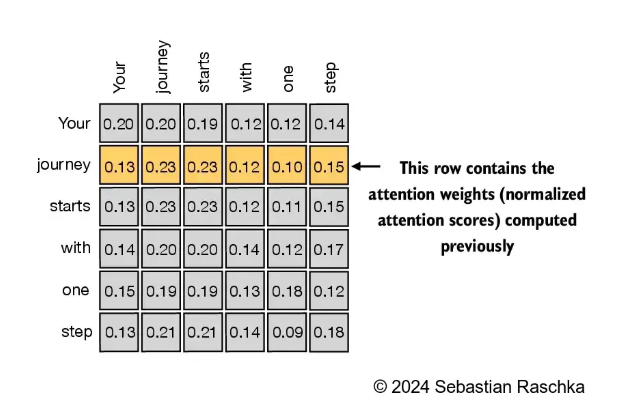

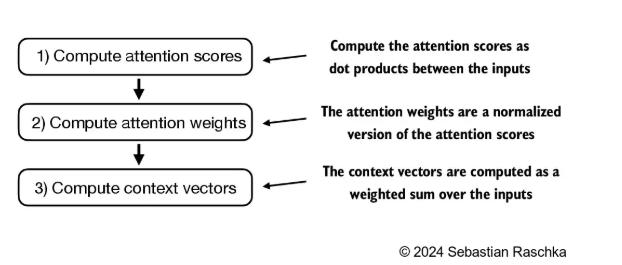

we can get the attention score via the mat mul

In [ ]:
attention_scores = inputs @ inputs.T
#  (6 , 3 )* (3 * 6) => (6 , 6)
print(attention_scores )
# now lets normalize them along the row
# normalizes makes the sum of all values betwwen 0 to 1
#  formula is softmax ex/sigma_ex
# ie if we give dim = -1 ie last dim we are saying its col ie
# we are saying that normalize all the values of col in single row and then go to next row

attention_scores = torch.softmax(attention_scores , dim = -1 )
print(f" the normalized attention scores : {attention_scores}")
# now lest find the final contextual emmbedings of all the vectors
contextual_embeddigns = attention_scores @ inputs
print(contextual_embeddigns)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
 the normalized attention scores : tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


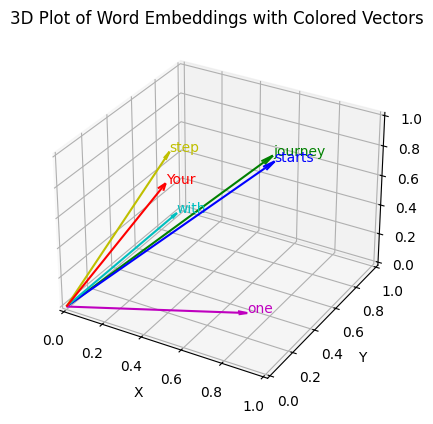

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

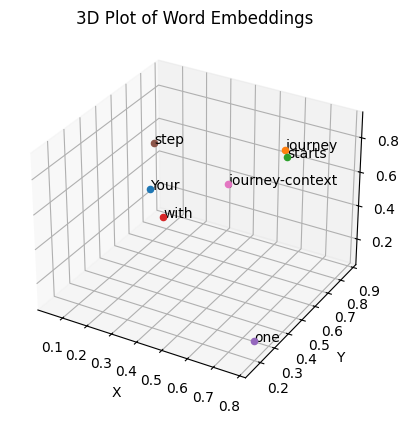

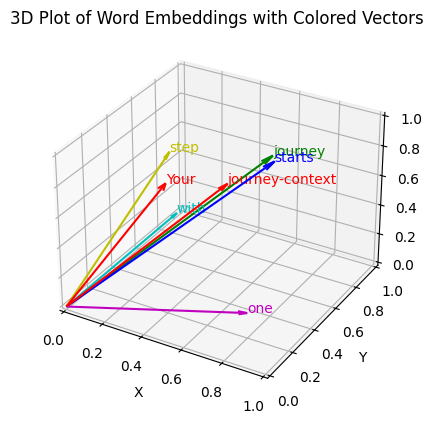

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

NOW LETS GO WITH THE SLEF ATTENTION WITH TRAINABLE PARAMETERS **NOW LETS GO WITH THE SLEF ATTENTION WITH TRAINABLE PARAMETERS **

we want to make the embeddings get trained

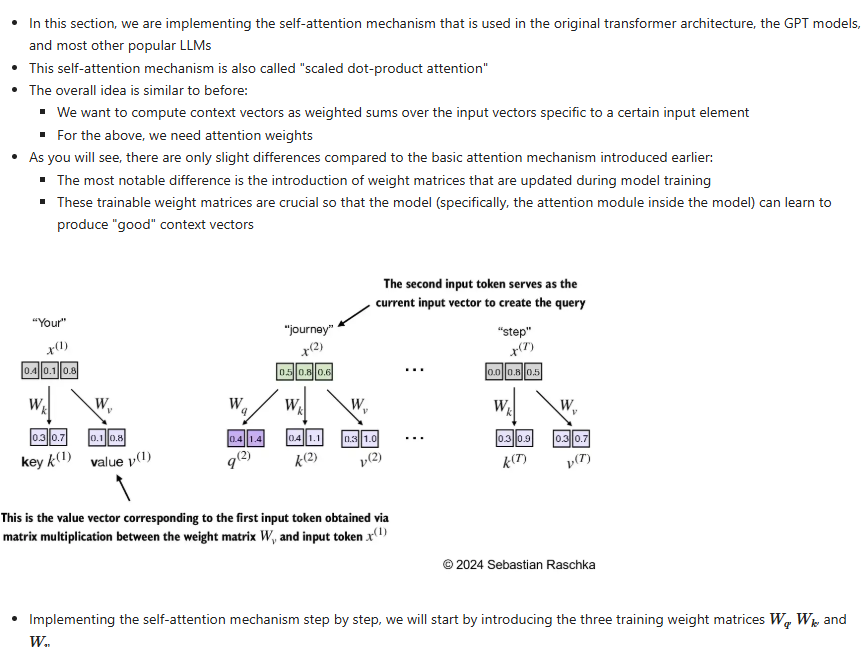

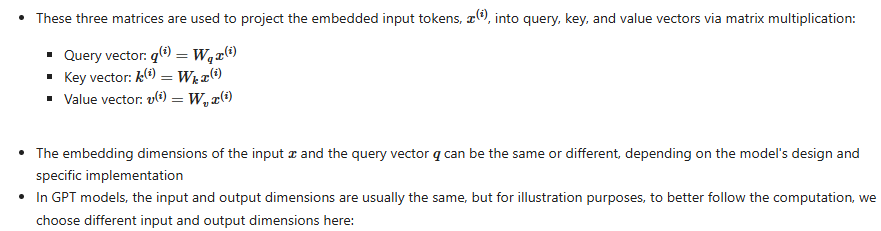

In [ ]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [ ]:
x_2 = inputs[2]
d_in = inputs.shape[1]
d_out = 2


where ever you want to inturduce the learnable parameter we bring the nn.Parameter .
ex: a(x)+b(y) you want a and b be parameter then a = nn.Parameter(2) like that for b  

In [ ]:
# here we want the query-key-value matrix ,
torch.manual_seed(123)
w_query = torch.nn.Parameter(torch.rand(d_in , d_out))
w_key = torch.nn.Parameter(torch.rand(d_in , d_out))
w_value = torch.nn.Parameter(torch.rand(d_in , d_out))

In [ ]:
print(f" this is query {w_query}")
print(f" this is key {w_key}")
print(f" this is value {w_value}")

 this is query Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]], requires_grad=True)
 this is key Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]], requires_grad=True)
 this is value Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]], requires_grad=True)


In [ ]:
keys = inputs @ w_key
values = inputs @ w_value
querys = inputs @ w_query
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


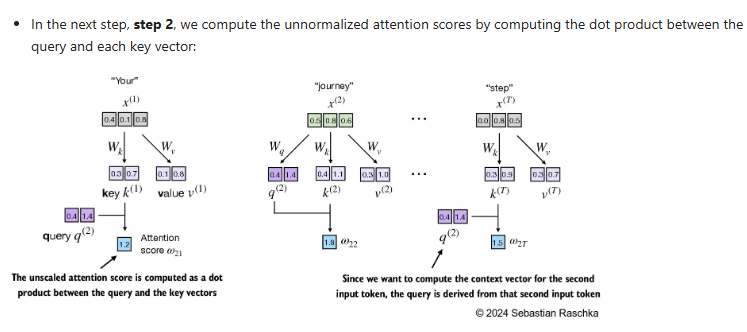

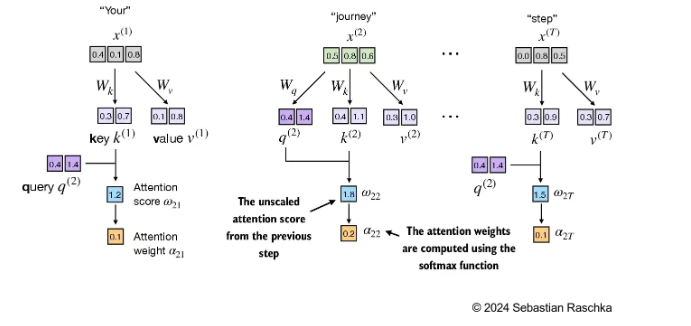

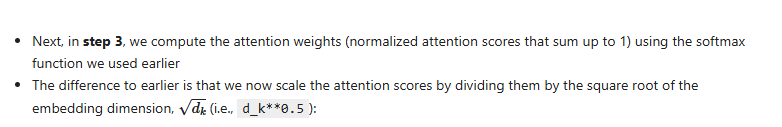

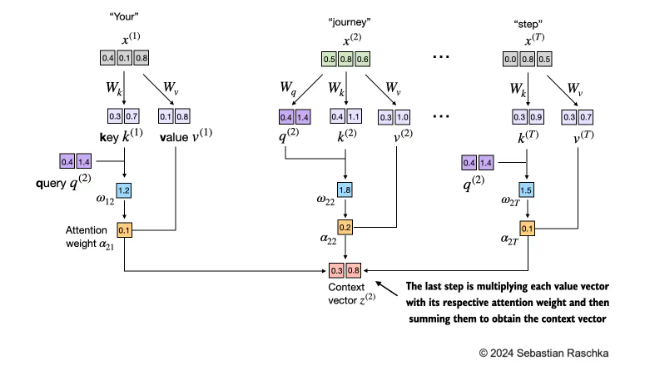

we know the self attention formula is
<br> self attention = softmax( q * k.t  / sqrt(d_model) ) * val

In [ ]:
import math
attention_score = querys @ keys.T
attention_score = attention_score/d_out**0.5
attention_score_normalized = torch.softmax(attention_score , dim = -1 )
print(attention_score_normalized)
contextual_vectors = attention_score_normalized @ values
print(contextual_vectors)


tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]],
       grad_fn=<SoftmaxBackward0>)
tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


NOW LETS GO WITH THE SLEF ATTENTION WITH TRAINABLE PARAMETERS

<div class="alert alert-block alert-warning">

Reason 1: For stability in learning

The softmax function is sensitive to the magnitudes of its inputs. When the inputs are large, the differences between the exponential values of each input become much more pronounced. This causes the softmax output to become "peaky," where the highest value receives almost all the probability mass, and the rest receive very little.

In attention mechanisms, particularly in transformers, if the dot products between query and key vectors become too large (like multiplying by 8 in this example), the attention scores can become very large. This results in a very sharp softmax distribution, making the model overly confident in one particular "key." Such sharp distributions can make learning unstable,
    
</div>

In [ ]:
import torch

# Define the tensor
tensor = torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])

# Apply softmax without scaling
softmax_result = torch.softmax(tensor, dim=-1)
print("Softmax without scaling:", softmax_result)

# Multiply the tensor by 8 and then apply softmax
scaled_tensor = tensor * 8
softmax_scaled_result = torch.softmax(scaled_tensor, dim=-1)
print("Softmax after scaling (tensor * 8):", softmax_scaled_result)

Softmax without scaling: tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])
Softmax after scaling (tensor * 8): tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])


## BUT WHY SQRT?

<div class="alert alert-block alert-warning">

Reason 2: To make the variance of the dot product stable

The dot product of  Q and K increases the variance because multiplying two random numbers increases the variance.

The increase in variance grows with the dimension.

Dividing by sqrt (dimension) keeps the variance close to 1
    
</div>

In [ ]:
import numpy as np

# Function to compute variance before and after scaling
def compute_variance(dim, num_trials=1000):
    dot_products = []
    scaled_dot_products = []

    # Generate multiple random vectors and compute dot products
    for _ in range(num_trials):
        q = np.random.randn(dim)
        k = np.random.randn(dim)

        # Compute dot product
        dot_product = np.dot(q, k)
        dot_products.append(dot_product)

        # Scale the dot product by sqrt(dim)
        scaled_dot_product = dot_product / np.sqrt(dim)
        scaled_dot_products.append(scaled_dot_product)

    # Calculate variance of the dot products
    variance_before_scaling = np.var(dot_products)
    variance_after_scaling = np.var(scaled_dot_products)

    return variance_before_scaling, variance_after_scaling

# For dimension 5
variance_before_5, variance_after_5 = compute_variance(5)
print(f"Variance before scaling (dim=5): {variance_before_5}")
print(f"Variance after scaling (dim=5): {variance_after_5}")

# For dimension 20
variance_before_100, variance_after_100 = compute_variance(100)
print(f"Variance before scaling (dim=100): {variance_before_100}")
print(f"Variance after scaling (dim=100): {variance_after_100}")



Variance before scaling (dim=5): 4.880517569931141
Variance after scaling (dim=5): 0.9761035139862277
Variance before scaling (dim=100): 98.05575510995935
Variance after scaling (dim=100): 0.9805575510995935


<center> **question build the simple self ATTENTION CLASS**
1) using the normal matrix level
<br>
2) using the nn.linear </center>

In [ ]:
import torch
from torch import nn
class SelfAttention_v1(nn.Module):
  def __init__(self , d_model ):
    super().__init__()
    self.wq = nn.Parameter(torch.rand(d_model  , d_model ))
    self.wk = nn.Parameter( torch.rand(d_model , d_model ))
    self.wv = nn.Parameter(torch.rand(d_model , d_model ))
    self.d_model = d_model

  def forward(self , x ):
    querys = x @ self.wq
    keys = x @ self.wk
    values = x @ self.wv
    attention_weights =  querys @ keys.T
    attention_scores =  torch.softmax( attention_weights / (self.d_model**0.5)  , dim = -1 )
    contextual_weights = attention_scores @ values

    return contextual_weights

In [ ]:
torch.manual_seed(123)
selfattention = SelfAttention_v1(d_model= 3 )
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
print(selfattention(inputs ))

tensor([[0.6692, 1.0276, 1.1106],
        [0.6864, 1.0577, 1.1389],
        [0.6860, 1.0570, 1.1383],
        [0.6738, 1.0361, 1.1180],
        [0.6711, 1.0307, 1.1139],
        [0.6783, 1.0441, 1.1252]], grad_fn=<MmBackward0>)


In [ ]:
import torch
from torch import nn

class SelfAttention_v2(nn.Module):
  def __init__(self , d_model ):
    super().__init__()
    self.wq = nn.Linear( d_model , d_model  , bias = False )
    self.wk = nn.Linear( d_model , d_model  , bias = False )
    self.wv = nn.Linear( d_model , d_model  , bias = False )
    self.d_model = d_model

  def forward(self , x):
    querys = self.wq(x)
    keys = self.wk(x)
    values = self.wv(x)

    a_w = querys @ keys.T
    a_s = torch.softmax( a_w / (self.d_model ** 0.5)  , dim = -1 )
    c_v = a_s @ values

    return c_v



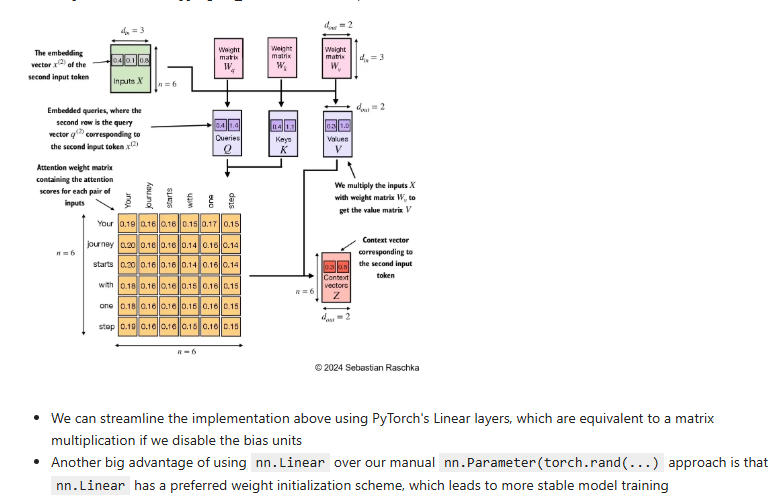

Note that SelfAttention_v1 and SelfAttention_v2 give different outputs because they use different initial weights for the weight matrices

In [ ]:
import torch
torch.manual_seed(123)
selfattention = SelfAttention_v2(d_model= 3 )
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
print(selfattention(inputs ))

tensor([[ 0.2633,  0.4277, -0.1353],
        [ 0.2641,  0.4296, -0.1350],
        [ 0.2641,  0.4296, -0.1350],
        [ 0.2647,  0.4316, -0.1381],
        [ 0.2642,  0.4303, -0.1373],
        [ 0.2648,  0.4316, -0.1375]], grad_fn=<MmBackward0>)


** HEY HERE I AM IMPLEMENTING THE causal SELF ATTENTION CLASS **

<center> NORMALLY WE KNOW THE GPT IS AUTO REGRESSIVE MODEL SO IE THE PRESNT OUTPUT BECOMES NEXT INPUT SO WE NEED TO TAKE CARE OF IT .
SO WHILE TRAINING WE SHOULD NOT MAKE THE PRESNT WORD EMBEDDINGS DEPEND ON THE FUTURE
IE IF SENTENCE IS " HELLO HOW ARE YOU"
HELLO DEPENDS ON HELLO ONLY , HOW DEPENDS ON HELLO AND HOW  SO ON.
WE NEED TO MAKE IT .
SO INORDER TO MAKE IT WE USE THE CAUSAL MASK WHICH MAKES THE MATRIX LOWE TRAINULAR SO THAT PRESENT DEPENDS ON PRESENT AND PAST NOT THE FUTURE .
 </center>

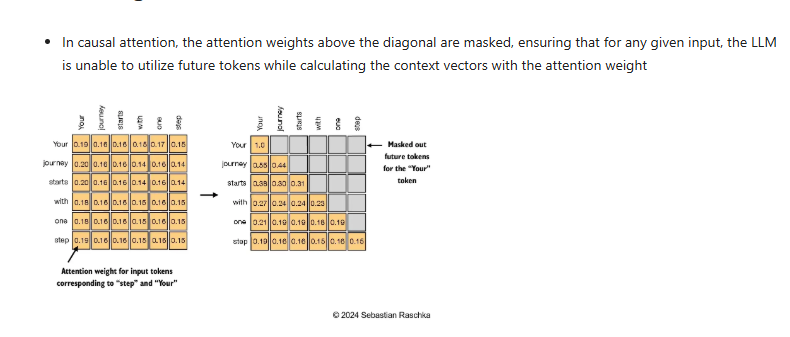

<CENTER> QUESTION : AS YOU  UNDERSTOOD CAUSAL ATTENTION YOU NEED TO MAKE THE ATTENTION WEIGHTS MASKED IE PRESENT DEPENDS ON THE PRESENT AND PAST NOT THE FUTURE .
SO MAKE MASK AND GET THE RESULTS .
TELL THE APPROACH </CENTER>

<CENTER> ANS : normally we know fllow happens like :
attention weights (q* k.t) -> attention score ie softmax( atten_wei / srt(dmodel) )-> contextual embeddings (atten_score * values ) <CENTER>
<center> we nened to apply the amsk to the attention weights ie (batch , seq_len , seq_len) .
we might thing as we want the lower traingle matrix so just take a lower traingle matrix with ones and zeros and multiply with attention weights but it is brings a problem </center>  

In [ ]:
slf_att = SelfAttention_v2(d_model = 3 )
queries = slf_att.wq(inputs)
keys = slf_att.wk(inputs )
values = slf_att.wv(inputs)


In [ ]:
attention_weights = queries @ keys.T
print(attention_weights)



tensor([[0.2298, 0.3836, 0.3826, 0.2073, 0.2570, 0.2310],
        [0.4658, 0.6554, 0.6526, 0.3457, 0.4181, 0.3975],
        [0.4653, 0.6537, 0.6509, 0.3446, 0.4173, 0.3962],
        [0.2575, 0.3556, 0.3539, 0.1872, 0.2242, 0.2167],
        [0.3254, 0.4392, 0.4375, 0.2289, 0.2845, 0.2615],
        [0.2790, 0.3959, 0.3939, 0.2099, 0.2478, 0.2436]],
       grad_fn=<MmBackward0>)


In [ ]:
mask = torch.tril(torch.ones(keys.shape[0]  , keys.shape[0]))
print(mask)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [ ]:
masked_attention_weights = attention_weights * mask
print(masked_attention_weights)

tensor([[0.2298, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4658, 0.6554, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4653, 0.6537, 0.6509, 0.0000, 0.0000, 0.0000],
        [0.2575, 0.3556, 0.3539, 0.1872, 0.0000, 0.0000],
        [0.3254, 0.4392, 0.4375, 0.2289, 0.2845, 0.0000],
        [0.2790, 0.3959, 0.3939, 0.2099, 0.2478, 0.2436]],
       grad_fn=<MulBackward0>)


<center> ya now the attention score which you not need is not available (only pres and past are available.) </center>
<br> PROBLEM <br>
we know that the  after that next stpe is calulclating the attention score ie applying the softmax fr normalization of the attention weights . as we know softmax formulae is e^(-x)/sigma(e^-x)
so e^0 is one
so if there are zeros in the matrix . they might still show effect on the attention scorews which is not desierable  ie  some importance as e^0 is 1 .

In [ ]:
attention_score = torch.softmax(masked_attention_weights  , dim = -1 )
print( attention_score )

tensor([[0.2011, 0.1598, 0.1598, 0.1598, 0.1598, 0.1598],
        [0.2119, 0.2561, 0.1330, 0.1330, 0.1330, 0.1330],
        [0.1889, 0.2280, 0.2274, 0.1186, 0.1186, 0.1186],
        [0.1760, 0.1941, 0.1938, 0.1640, 0.1360, 0.1360],
        [0.1715, 0.1922, 0.1919, 0.1558, 0.1647, 0.1239],
        [0.1636, 0.1839, 0.1835, 0.1527, 0.1586, 0.1579]],
       grad_fn=<SoftmaxBackward0>)


<center> so see we waht the zero term in the futre terms but we are not seeing it so wee need to find the alternative for it </center>

<alternative> ** we rather than making the future attention weights zero ,we make them minus infinity intution behind it is e^(-inf) is zero   **

<center>** we bring the infinity term in 3 steps
1) caluclate the attention wegihts
  2) make a bool vetor of upper trianular matrix ie regin where we want the -inf
  3) keep the -inf values using the maskedfill fucntion of the pytrch . ** </center>

In [ ]:
attention_weights = queries @  keys.T
print(attention_weights)


tensor([[ 0.0062,  0.0668,  0.0696,  0.0330,  0.1002,  0.0085],
        [-0.3421, -0.1685, -0.1674, -0.0545, -0.1004, -0.0736],
        [-0.3478, -0.1763, -0.1751, -0.0587, -0.1051, -0.0785],
        [-0.1999, -0.0943, -0.0942, -0.0278, -0.0656, -0.0337],
        [-0.3514, -0.2667, -0.2651, -0.1164, -0.1603, -0.1440],
        [-0.1566, -0.0246, -0.0249,  0.0102, -0.0228,  0.0106]],
       grad_fn=<MmBackward0>)


In [ ]:
mask = torch.triu(torch.ones(keys.shape[-2] , keys.shape[-2] ) , diagonal = 1)
print(mask)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])


In [ ]:
masked_attention_weights = attention_weights.masked_fill(mask.bool() , -torch.inf)
print(masked_attention_weights )

tensor([[ 0.0062,    -inf,    -inf,    -inf,    -inf,    -inf],
        [-0.3421, -0.1685,    -inf,    -inf,    -inf,    -inf],
        [-0.3478, -0.1763, -0.1751,    -inf,    -inf,    -inf],
        [-0.1999, -0.0943, -0.0942, -0.0278,    -inf,    -inf],
        [-0.3514, -0.2667, -0.2651, -0.1164, -0.1603,    -inf],
        [-0.1566, -0.0246, -0.0249,  0.0102, -0.0228,  0.0106]],
       grad_fn=<MaskedFillBackward0>)


see the -inf terms  

In [ ]:
attention_score = torch.softmax(masked_attention_weights , dim = -1 )
print(attention_score)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4567, 0.5433, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2963, 0.3517, 0.3521, 0.0000, 0.0000, 0.0000],
        [0.2267, 0.2520, 0.2520, 0.2693, 0.0000, 0.0000],
        [0.1769, 0.1925, 0.1928, 0.2237, 0.2141, 0.0000],
        [0.1473, 0.1681, 0.1680, 0.1741, 0.1684, 0.1741]],
       grad_fn=<SoftmaxBackward0>)


this is what the result is

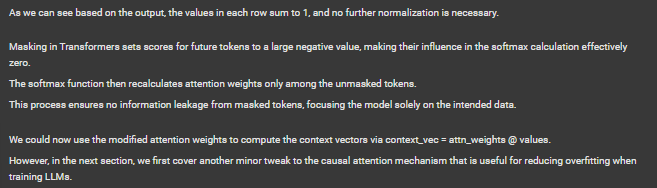

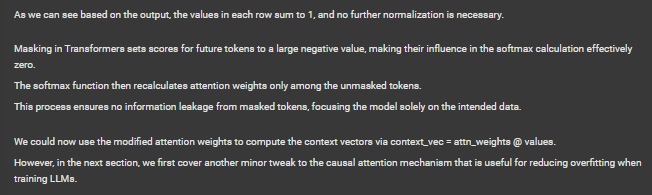

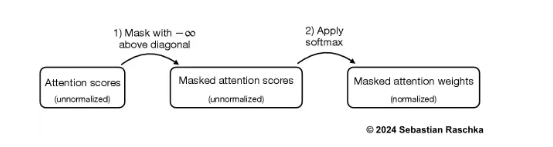

**ADIING THE DROPOUT**

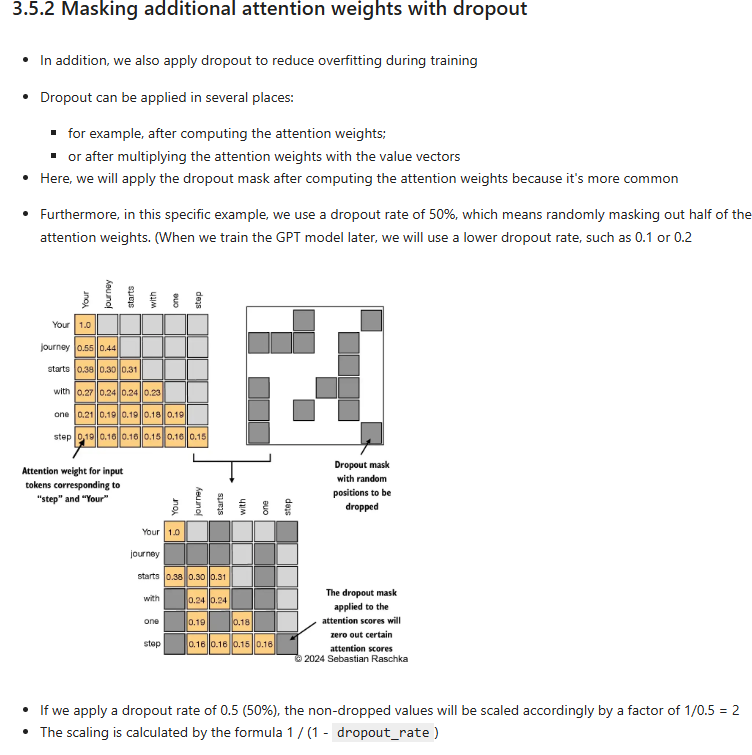

<center> question : make a tensor of 6 x 6 and apply the dropout of 50% and also apply the dropout for the attention weights calculated before . also explain its importance .<center>

**NOTE THEY SAY TO APPLY THE DROPUT to the attention weights .
to understand the way we apply it understand the purpose .
<br> pnurpose is that we wan the model not to by hear the pattern . ie if some words change also we have to predict the next token correct  ie
if sentence is
"you are a good person:  and the intention is that if some wordsa re mssing also the  model should predict the next token correct
ie "you are _ good is there then also we want to get the same person as output **

NOTE : ** this is my method not the secientists method.
after making the lower tranangluar matrix with upper values as -inf signify that upper values are not there .
so giving  the -inf is saying these are not available .
so write the core that some random values in the masked attention weights are inf in the lower triangluar region also  **

<center i am not wrting the code for it ask sir and then write the code </center>

In [ ]:
examp = torch.ones(6 , 6)
dropout = torch.nn.Dropout(0.5)
new_examp = dropout(examp)
print(new_examp)
print(f" the attention weights after the drpout is {dropout(masked_attention_weights)}")


** the dropout helps in decreasing the overfitting .
we see the scaling factor (1/1-dropout) is multiplied so that activation will be same .**

<center> ** QUESTION : create a causal attention class where user gives the input embeddings in form of (batch , contextlen , d_modle ) and you need to make generate the contextual  embedddings of input**</center>

In [ ]:
import torch
from torch import nn

class Causal_attention(nn.Module):
  def __init__(self , d_in  , d_out , seq_len , dropout):
    super().__init__()
    self.d_in = d_in
    self.d_out = d_out
    self.dropout = dropout
    # now we need linear layers of query , key , value
    self.wq = nn.Linear(d_in , d_out , bias = False)
    self.wk = nn.Linear(d_in , d_out , bias = False)
    self.wv = nn.Linear(d_in , d_out , bias = False)
    # now we know for causal attention we nned to make mask for the
    # attention weights(q , k.t) which is called inf mask
    # so for creating the inf mask we need the upper traingual matrix with 1
    # so later will use it with masked__fill to fill with -inf
    self.register_buffer('mask' , torch.triu(torch.ones(seq_len , seq_len ) , diagonal = 1 ) )
    # why register as buffer see down
    self.dropout = nn.Dropout(dropout)

  def forward(self , x ):
    queries = self.wq(x)
    keys = self.wk(x)
    values = self.wv(x)

    self.attention_weights =  queries @ keys.transpose(1 , 2)
    self.attention_weights.masked_fill_(self.mask.bool() , -torch.inf)
    self.attention_score = torch.softmax( self.attention_weights , dim = -1)
    self.attention_score = self.dropout(self.attention_score)
    contextual_embeddings = self.attention_score @ values


    return contextual_embeddings








In [ ]:
torch.manual_seed(123)
input = torch.randn(2 , 6 , 3 )
print(f" input is {input} ")
att = Causal_attention(d_in = 3 , d_out = 3 , seq_len = 6 , dropout = 0.4 )
context_output = att(input)
print(f"  attention weights is {att.attention_weights} ")
print(f" attention_score is {att.attention_score} ")
print(f" mask is {att.mask}")




 input is tensor([[[ 0.3374, -0.1778, -0.3035],
         [-0.5880,  0.3486,  0.6603],
         [-0.2196, -0.3792,  0.7671],
         [-1.1925,  0.6984, -1.4097],
         [ 0.1794,  1.8951,  0.4954],
         [ 0.2692, -0.0770, -1.0205]],

        [[-0.1690,  0.9178, -0.3885],
         [-0.9343, -0.4991, -1.0867],
         [ 0.9624,  0.2492, -0.4845],
         [-2.0929,  0.0983, -0.0935],
         [ 0.2662, -0.5850, -0.3430],
         [-0.6821, -0.9887, -1.7018]]]) 
  attention weights is tensor([[[ 0.0215,    -inf,    -inf,    -inf,    -inf,    -inf],
         [-0.0400,  0.0632,    -inf,    -inf,    -inf,    -inf],
         [-0.0911,  0.1639,  0.0990,    -inf,    -inf,    -inf],
         [ 0.0512, -0.0980, -0.2163,  0.1609,    -inf,    -inf],
         [ 0.1786, -0.3435, -0.4109,  0.1645,  0.3542,    -inf],
         [ 0.0614, -0.1042, -0.0013, -0.3028, -0.0244,  0.0204]],

        [[ 0.1485,    -inf,    -inf,    -inf,    -inf,    -inf],
         [ 0.0215,  0.0159,    -inf,    -inf,    

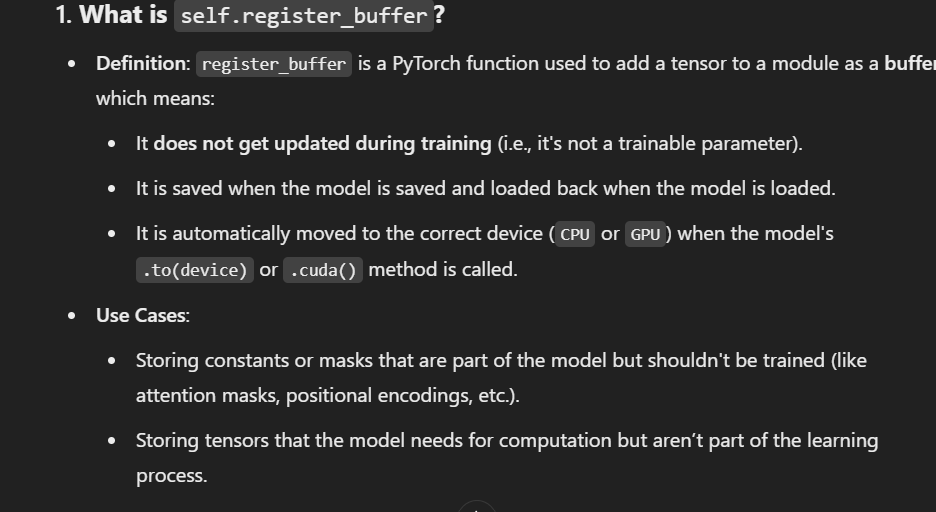

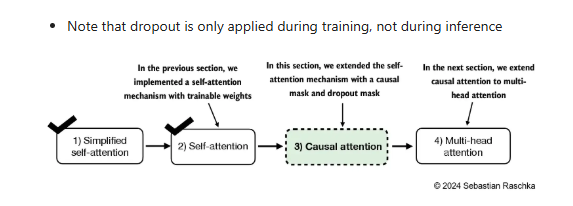

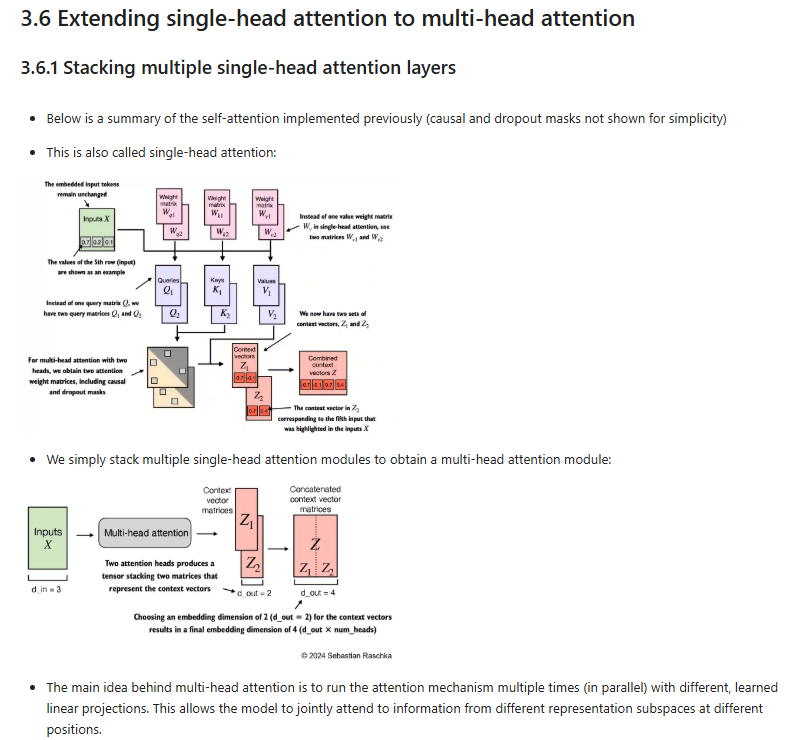

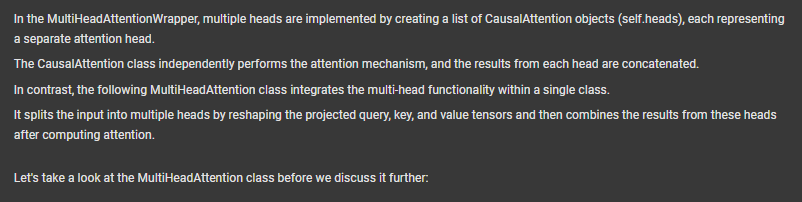

<center> ** build multihead attention ** </center>

In [ ]:
import torch
from torch import nn
class MultiHeadAttention(nn.Module):
  def __init__(self , d_in , d_out , context_length  , dropout , num_heads , qkv_bias= False ):
    super().__init__()

    # giving the variables to the class
    self.d_out = d_out
    self.d_in = d_in
    self.context_length = context_length
    self.dropout = nn.Dropout(dropout)
    self.num_heads = num_heads
    # caluclating the head dim

    self.head_dim = d_out // num_heads

    # making the wq , wk , wv
    self.wq = nn.Linear( d_in , d_out  , bias = qkv_bias )
    self.wk = nn.Linear( d_in , d_out  , bias = qkv_bias )
    self.wv = nn.Linear( d_in , d_out  , bias = qkv_bias )

    # note here we use the nn.linear for making the heads outputs combine
    self.out_proj =  nn.linear(d_out , d_out )

    self.register_buffer( "mask" , torch.triu(torch.ones(context_length , context_length ) , diagonal = 1 ))


  def forward(self , x ):
    b , num_tokens , d_in = x.shape

    queries = self.wq(x)
    keys = self.wk(x)
    values = self.wv(x)

    # now the slipting starts ie if we have ( 1 , 3 , 6 ) as input and
    # q , v , k all are of (1 , 3 , 6 ) now heads splitiing is like we split the 6 into 2 parts
    # ie 6 to 2 heads we will split it
    # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)

    keys = keys.view( b , num_tokens  , self.num_heads  , self.head_dim )
    query = query.view( b , num_tokens  , self.num_heads  , self.head_dim )
    value = value.view( b , num_tokens  , self.num_heads  , self.head_dim )

    # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim )

    keys = keys.transpose(1 , 2)
    queries  = queries.transpose(1 , 2)
    values = values.transpose(1 , 2)

    # Compute scaled dot-product attention (aka self-attention) with a causal mask
    attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head


    mask_bool = self.mask.bool()[:num_tokens][:num_tokens]
    # Use the mask to fill attention scores
    attn_scores.masked_fill_(mask_bool , -torch.inf)

    attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5 , dim = -1 )
    attn_weights = self.dropout(attn_weights )
  # Shape: (b, num_tokens, num_heads, head_dim)
    context_vec = (attn_weights @ values ).transpose(1 , 2)
# Combine heads, where self.d_out = self.num_heads * self.head_dim
    context_vec = context_vec.contiguous().view( b , num_tokens , self.d_out )
    context_vec = self.out_proj(context_vec) # optional projection

    return context_vec










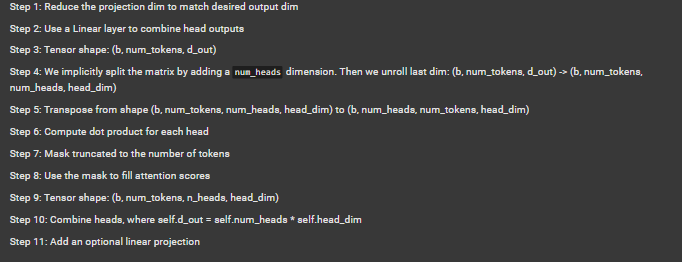

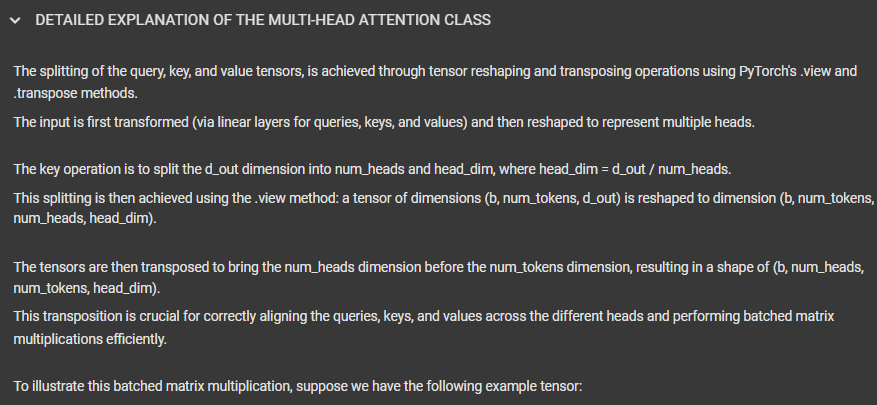

In [ ]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573], #A
[0.8993, 0.0390, 0.9268, 0.7388],
[0.7179, 0.7058, 0.9156, 0.4340]],
[[0.0772, 0.3565, 0.1479, 0.5331],
[0.4066, 0.2318, 0.4545, 0.9737],
[0.4606, 0.5159, 0.4220, 0.5786]]]])

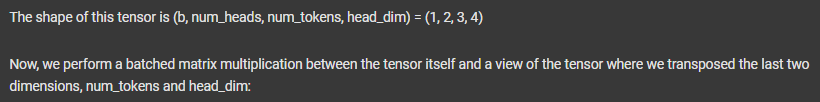

In [ ]:
print(a @ a.transpose(2, 3))


tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


In [ ]:
first_head = a[0, 0, :, :]
first_res = first_head @ first_head.T
print("First head:\n", first_res)
second_head = a[0, 1, :, :]
second_res = second_head @ second_head.T
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])


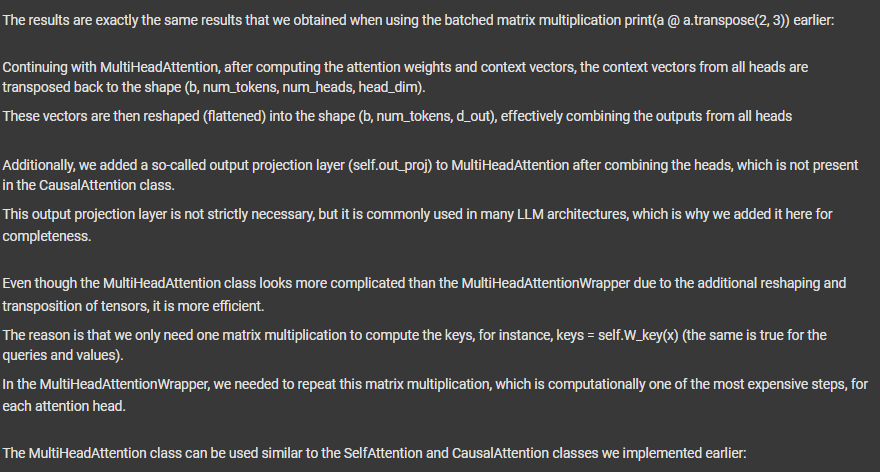

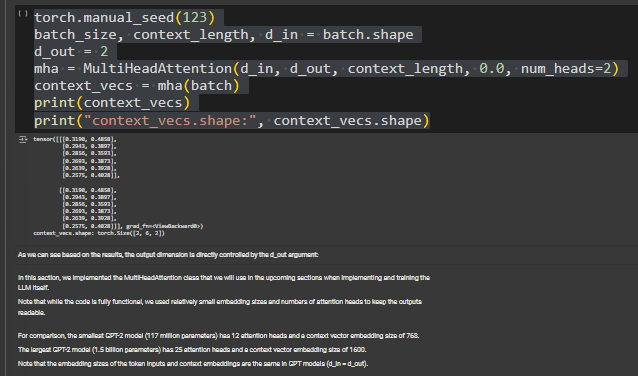

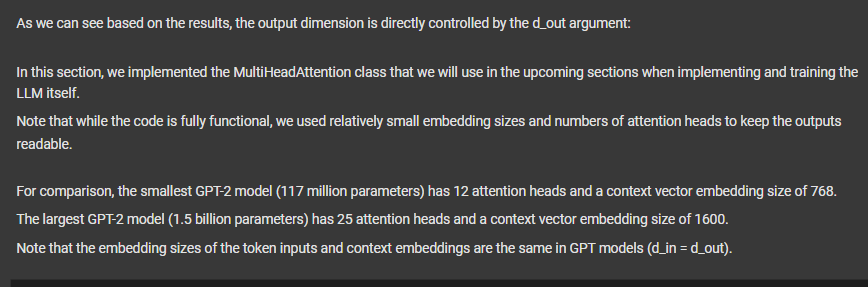